In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

f_name = 'NGA_West2_finitefault.csv'

pd.set_option('display.max_columns', None)


df = pd.read_csv(f_name)
df.replace(np.nan, 0)
df.replace('',0, regex=True)
df.columns

Index(['EQID', 'Earthquake Name', 'Moment Magnitude', 'Magnitude Type',
       'Finite Fault Flag', 'Hypocenter Latitude (deg)',
       'Hypocenter Longitude (deg)', 'Hypocenter Depth (km)',
       'Total Fault Length (km)', 'Total Fault Width (km)',
       ...
       'Depth: ULC (km).10', 'Segment Number.11', 'Strike (deg).11',
       'Dip  (deg).11', ' Length (km).11', 'Width (km).11', 'Rake (deg).11',
       'Latitude: Upper Left Corner (ULC) (deg)', 'Longitude: ULC  (deg).11',
       'Depth: ULC (km).11'],
      dtype='object', length=120)

In [6]:
from sklearn import metrics
x_set_values = df[['Hypocenter Depth (km)', 'Total Fault Length (km)', 'Total Fault Width (km)','Strike (deg)',
'Dip  (deg)']].values

y_set_values = df['Moment Magnitude'].values

from sklearn.model_selection import train_test_split

x_train25, x_test25, y_train25, y_test25 = train_test_split(x_set_values, 
y_set_values, test_size = 0.25, random_state=1)

print(y_train25, type(y_train25))

# Scaled values using standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

sc = StandardScaler()
x_train25 = sc.fit_transform(x_train25)
x_test25 = sc.transform(x_test25)

# Fitting the classifier to training set
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
# classifier.fit(x_train25, y_train25)

# y_pred_dt = classifier.predict(x_test25)

[6.8  3.6  4.3  6.54 3.72 5.09 3.81 4.51 4.12 6.8  6.3  4.04 7.1  5.1
 4.6  3.6  0.   3.37 3.14 3.9  3.7  5.2  4.1  4.1  6.1  4.02 7.62 6.1
 5.3  3.   3.5  3.2  3.63 6.06 5.01 4.7  4.6  7.37 5.4  3.64 4.42 6.69
 3.6  3.4  4.9  7.3  3.87 4.7  3.74 4.69 4.88 4.27 7.68 3.75 6.6  5.1
 7.36 5.2  3.4  3.58 5.69 4.2  3.22 3.74 4.   4.36 3.52 4.14 5.9  6.
 6.32 3.17 3.59 6.19 5.7  4.78 3.53 5.7  5.4  5.31 3.05 7.2  6.2  6.3
 3.88 4.42 3.7  3.8  3.43 3.8  5.18 5.92 4.19 3.2  5.   4.   5.8  5.77
 5.5  3.8  6.6  3.74 5.44 5.27 4.26 4.05 4.24 3.67 3.96 5.5  4.1  5.5
 6.3  3.9  4.2  7.9  6.69 4.53 3.69 4.1  3.78 5.03 3.73 6.2  4.3  6.76
 3.8  3.5  3.9  3.59 6.46 6.   4.37 5.2  5.1  6.6  3.9  6.7  4.01 1.3
 4.3  6.19 3.5  5.7  3.8  7.36 4.71 3.5  4.19 4.9  3.73 3.99 7.21 4.88
 6.   3.33 3.63 4.1  0.   7.9  3.7  4.3  5.7  5.3  7.35 6.53 3.43 6.6
 5.2  4.11 5.7  7.2  3.1  5.65 5.1  3.1  3.77 3.25 4.2  5.28 5.1  3.9
 4.11 4.7  5.2  3.97 5.   5.7  4.66 5.2  4.4  4.02 5.39 5.63 4.27 6.
 4.6  3.73 3.62 4.

In [10]:
type(y_train25[0])

numpy.float64

In [ ]:
# from sklearn import metrics
cm = metrics.confusion_matrix(y_test25, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)

cm_display.from_predictions(
    y_test25, y_pred_dt, cmap = 'Accent'
)

plt.savefig('Decision Tree 25% test case.jpg')
plt.show()

In [ ]:
metrics.precision_score(y_test25, y_pred_dt, average='macro')

In [ ]:
from sklearn import tree
fn = ['cement', 'slag', 'flyash','water',
'superplasticizer','coarseaggregate','fineaggregate','age']
cn = ['HSC','LSC','SSC']

fig,ax = plt.subplots(figsize=(15,10), dpi = 600)

tree.plot_tree(classifier,
feature_names = fn,
class_names = cn, 
filled=True);

plt.savefig('tree c45.jpg')

plt.show()

In [11]:
from sklearn.neural_network import MLPRegressor as mlp 

clf = mlp(solver = 'lbfgs',
alpha = 1e-5,
hidden_layer_sizes = (100,6),
random_state=1)

clf.fit(x_train25, y_train25)

y_pred_nn = clf.predict(x_test25)

c:\Users\kickk\.conda\envs\scientific-computing\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [17]:
residuals = y_test25 - y_pred_nn 

In [25]:
df_temp = pd.DataFrame(
    {'Actual': y_test25,
    'Predicted': y_pred_nn}
)

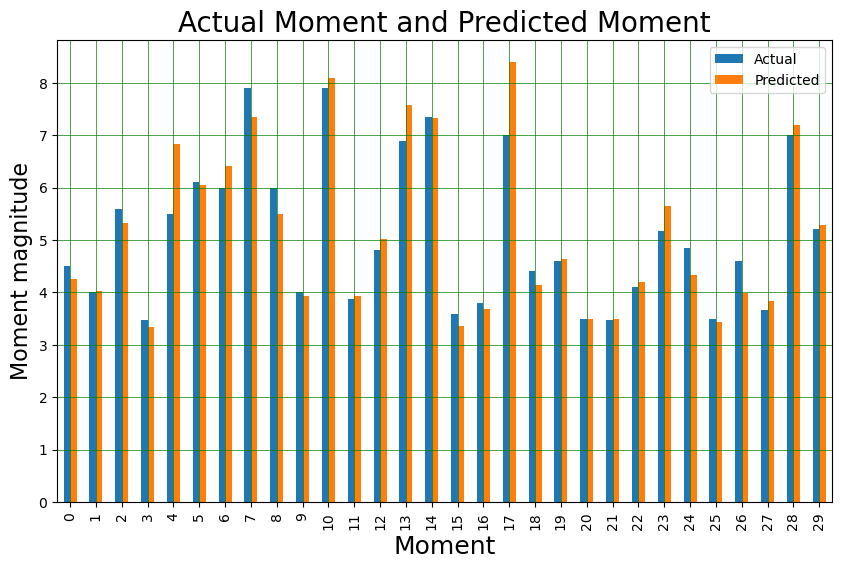

In [29]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')



plt.title('Actual Moment and Predicted Moment', fontsize=20)
plt.xlabel('Moment', fontsize=18)
plt.ylabel('Moment magnitude', fontsize=16)
plt.savefig('Moments predicted.jpg')

plt.show()

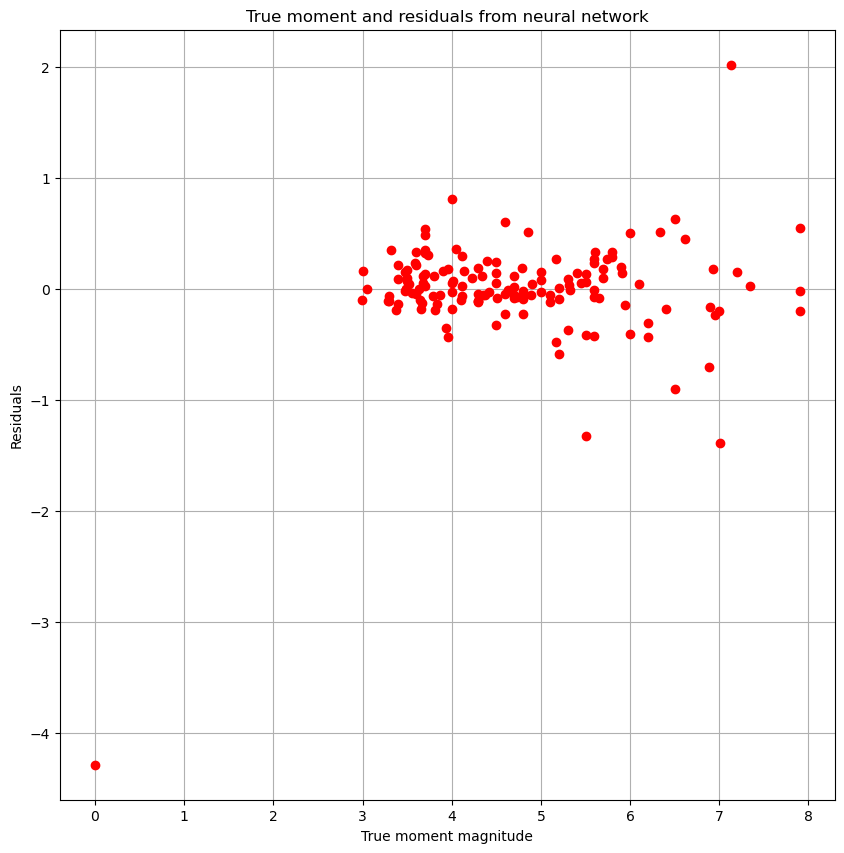

In [32]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(y_test25, residuals, 'ro')

ax.set_xlabel('True moment magnitude')
ax.set_ylabel('Residuals')

plt.title('True moment and residuals from neural network')

plt.savefig('residuals.png')
plt.grid(which='both', axis = 'both')
plt.show()

In [24]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

AttributeError: 'MLPRegressor' object has no attribute 'loss_curve_'

In [12]:
cm_nn = metrics.confusion_matrix(y_test25, y_pred_nn)
cm_nn_plt = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm_nn, display_labels = clf.classes_
)

cm_nn_plt.from_predictions(
    y_test25, y_pred_nn, cmap = 'OrRd'
)

plt.savefig('neural_network_25%.jpg')
plt.show()

ValueError: continuous is not supported

In [ ]:
metrics.precision_score(y_test25, y_pred_nn, average='macro')